# What to expect

In notebooks 2A and 2B we took a first look at the results from STAR, normalizing them and viewing them with DeSeq2. In this session we are going to look at which genes are the most highly differentially expressed, and investigate the GO terms and pathways associated with them. We will do this first for the example dataset <i>Schistosoma mansoni</i>, and then in notebook 3B you will repeat the process for your chosen dataset.

In [5]:
# import required libraries
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [65]:
# load in the counts and metadata again
counts = pd.read_csv("analysis/Schistosoma_mansoni/star/ReadsPerGene.csv", index_col=0).T
metadata = pd.read_csv("data/Schistosoma_mansoni/metadata.csv", index_col=0)

In [67]:
counts

gene,N_unmapped,gene:Smp_000020,gene:Smp_000030,gene:Smp_000040,gene:Smp_000050,gene:Smp_000070,gene:Smp_000075,gene:Smp_000080,gene:Smp_000100,gene:Smp_000110,...,gene:Smp_900020,gene:Smp_900030,gene:Smp_900040,gene:Smp_900050,gene:Smp_900060,gene:Smp_900070,gene:Smp_900080,gene:Smp_900090,gene:Smp_900100,gene:Smp_900110
ERR022872,9713472,3210,12471,2613,921,1417,0,0,23704,2378,...,53366,27373,77619,324954,21739,53596,3680,157096,10453,137747
ERR022873,2884272,2088,11096,6520,674,951,0,0,5337,736,...,27207,14664,62610,126419,14062,23333,3647,61805,11739,60344
ERR022874,4220356,1110,5521,1253,933,435,4,0,8419,829,...,1209,1276,1950,7277,994,1567,129,5871,147,4121
ERR022875,4374914,2285,9389,1883,213,647,0,0,15485,1655,...,46037,24086,29747,202072,20329,41482,4700,196705,1766,121432
ERR022876,13889423,4027,18769,4733,3709,1533,4,1,29972,2855,...,4601,5888,10965,31396,4795,8333,719,28999,623,19715
ERR022877,12598043,5330,23578,4596,1575,2135,22,14,53937,2953,...,45999,11014,56945,250519,8114,44138,18493,206111,8029,167852
ERR022878,8800443,3281,17393,3082,1104,1618,0,4,37706,2191,...,29664,8179,47841,138034,8001,32248,8234,156191,3453,90992
ERR022879,8713202,9008,26427,12887,18191,2030,0,223,37590,4338,...,4120,3934,9331,21811,3020,5266,786,8468,1692,7765
ERR022880,8186486,8140,23891,11370,8154,2333,4,43,12204,4081,...,5541,4449,12281,30837,4368,7790,1357,13032,864,12620
ERR022881,9961049,7242,23569,10838,6218,2397,2,19,10429,3980,...,5334,4300,12218,44937,4571,9944,1056,14253,819,13669


In [46]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]
print(counts_df.shape)

(18, 8884)


In [48]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    inference=inference,
)

In [49]:
dds.deseq2()


if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds.pkl"), "wb") as f:
        pkl.dump(dds, f)

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.98 seconds.

Fitting dispersion trend curve...
/opt/miniconda3/envs/pathbio3/lib/python3.10/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 1.74 seconds.

Fitting LFCs...
... done in 2.62 seconds.

Replacing 2 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



In [50]:
print(dds)


AnnData object with n_obs × n_vars = 18 × 8884
    obs: 'BioSample', 'condition', 'Organism', 'morphology'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


In [52]:
stat_res = DeseqStats(dds, inference=inference)

In [53]:
stat_res.summary()

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "stat_results.pkl"), "wb") as f:
        pkl.dump(stat_res, f)

Running Wald tests...


Log2 fold change & Wald test p-value: condition peak vs ascending
                                    baseMean  log2FoldChange     lfcSE  \
gene                                                                     
N_ambiguous                     3.527111e+03        0.182442  0.938575   
N_multimapping                  1.737364e+07       -0.004136  1.180543   
N_noFeature                     4.561896e+07       -0.027391  1.377890   
N_unmapped                      4.334827e+06        0.217962  1.181040   
Tb04.24M18.150                  3.319435e+00        0.360655  1.915173   
...                                      ...             ...       ...   
Tb927_10_v4.snoRNA.0040:snoRNA  3.548795e-02        0.127366  2.227792   
Tb927_10_v4.snoRNA.0056:snoRNA  3.309083e-02        0.255075  2.471031   
Tb927_10_v4.snoRNA.0063:snoRNA  6.338538e-02        0.104510  2.201089   
Tb927_10_v4.snoRNA.0078:snoRNA  2.251472e+00        0.376756  1.882855   
tmp.1.100                       8.326575e-01  

... done in 0.80 seconds.



Running Wald tests...
... done in 0.87 seconds.



Log2 fold change & Wald test p-value: condition peak vs ascending
                                    baseMean  log2FoldChange     lfcSE  \
gene                                                                     
N_ambiguous                     3.527111e+03        0.182442  0.938575   
N_multimapping                  1.737364e+07       -0.004136  1.180543   
N_noFeature                     4.561896e+07       -0.027391  1.377890   
N_unmapped                      4.334827e+06        0.217962  1.181040   
Tb04.24M18.150                  3.319435e+00        0.360655  1.915173   
...                                      ...             ...       ...   
Tb927_10_v4.snoRNA.0040:snoRNA  3.548795e-02        0.127366  2.227792   
Tb927_10_v4.snoRNA.0056:snoRNA  3.309083e-02        0.255075  2.471031   
Tb927_10_v4.snoRNA.0063:snoRNA  6.338538e-02        0.104510  2.201089   
Tb927_10_v4.snoRNA.0078:snoRNA  2.251472e+00        0.376756  1.882855   
tmp.1.100                       8.326575e-01  

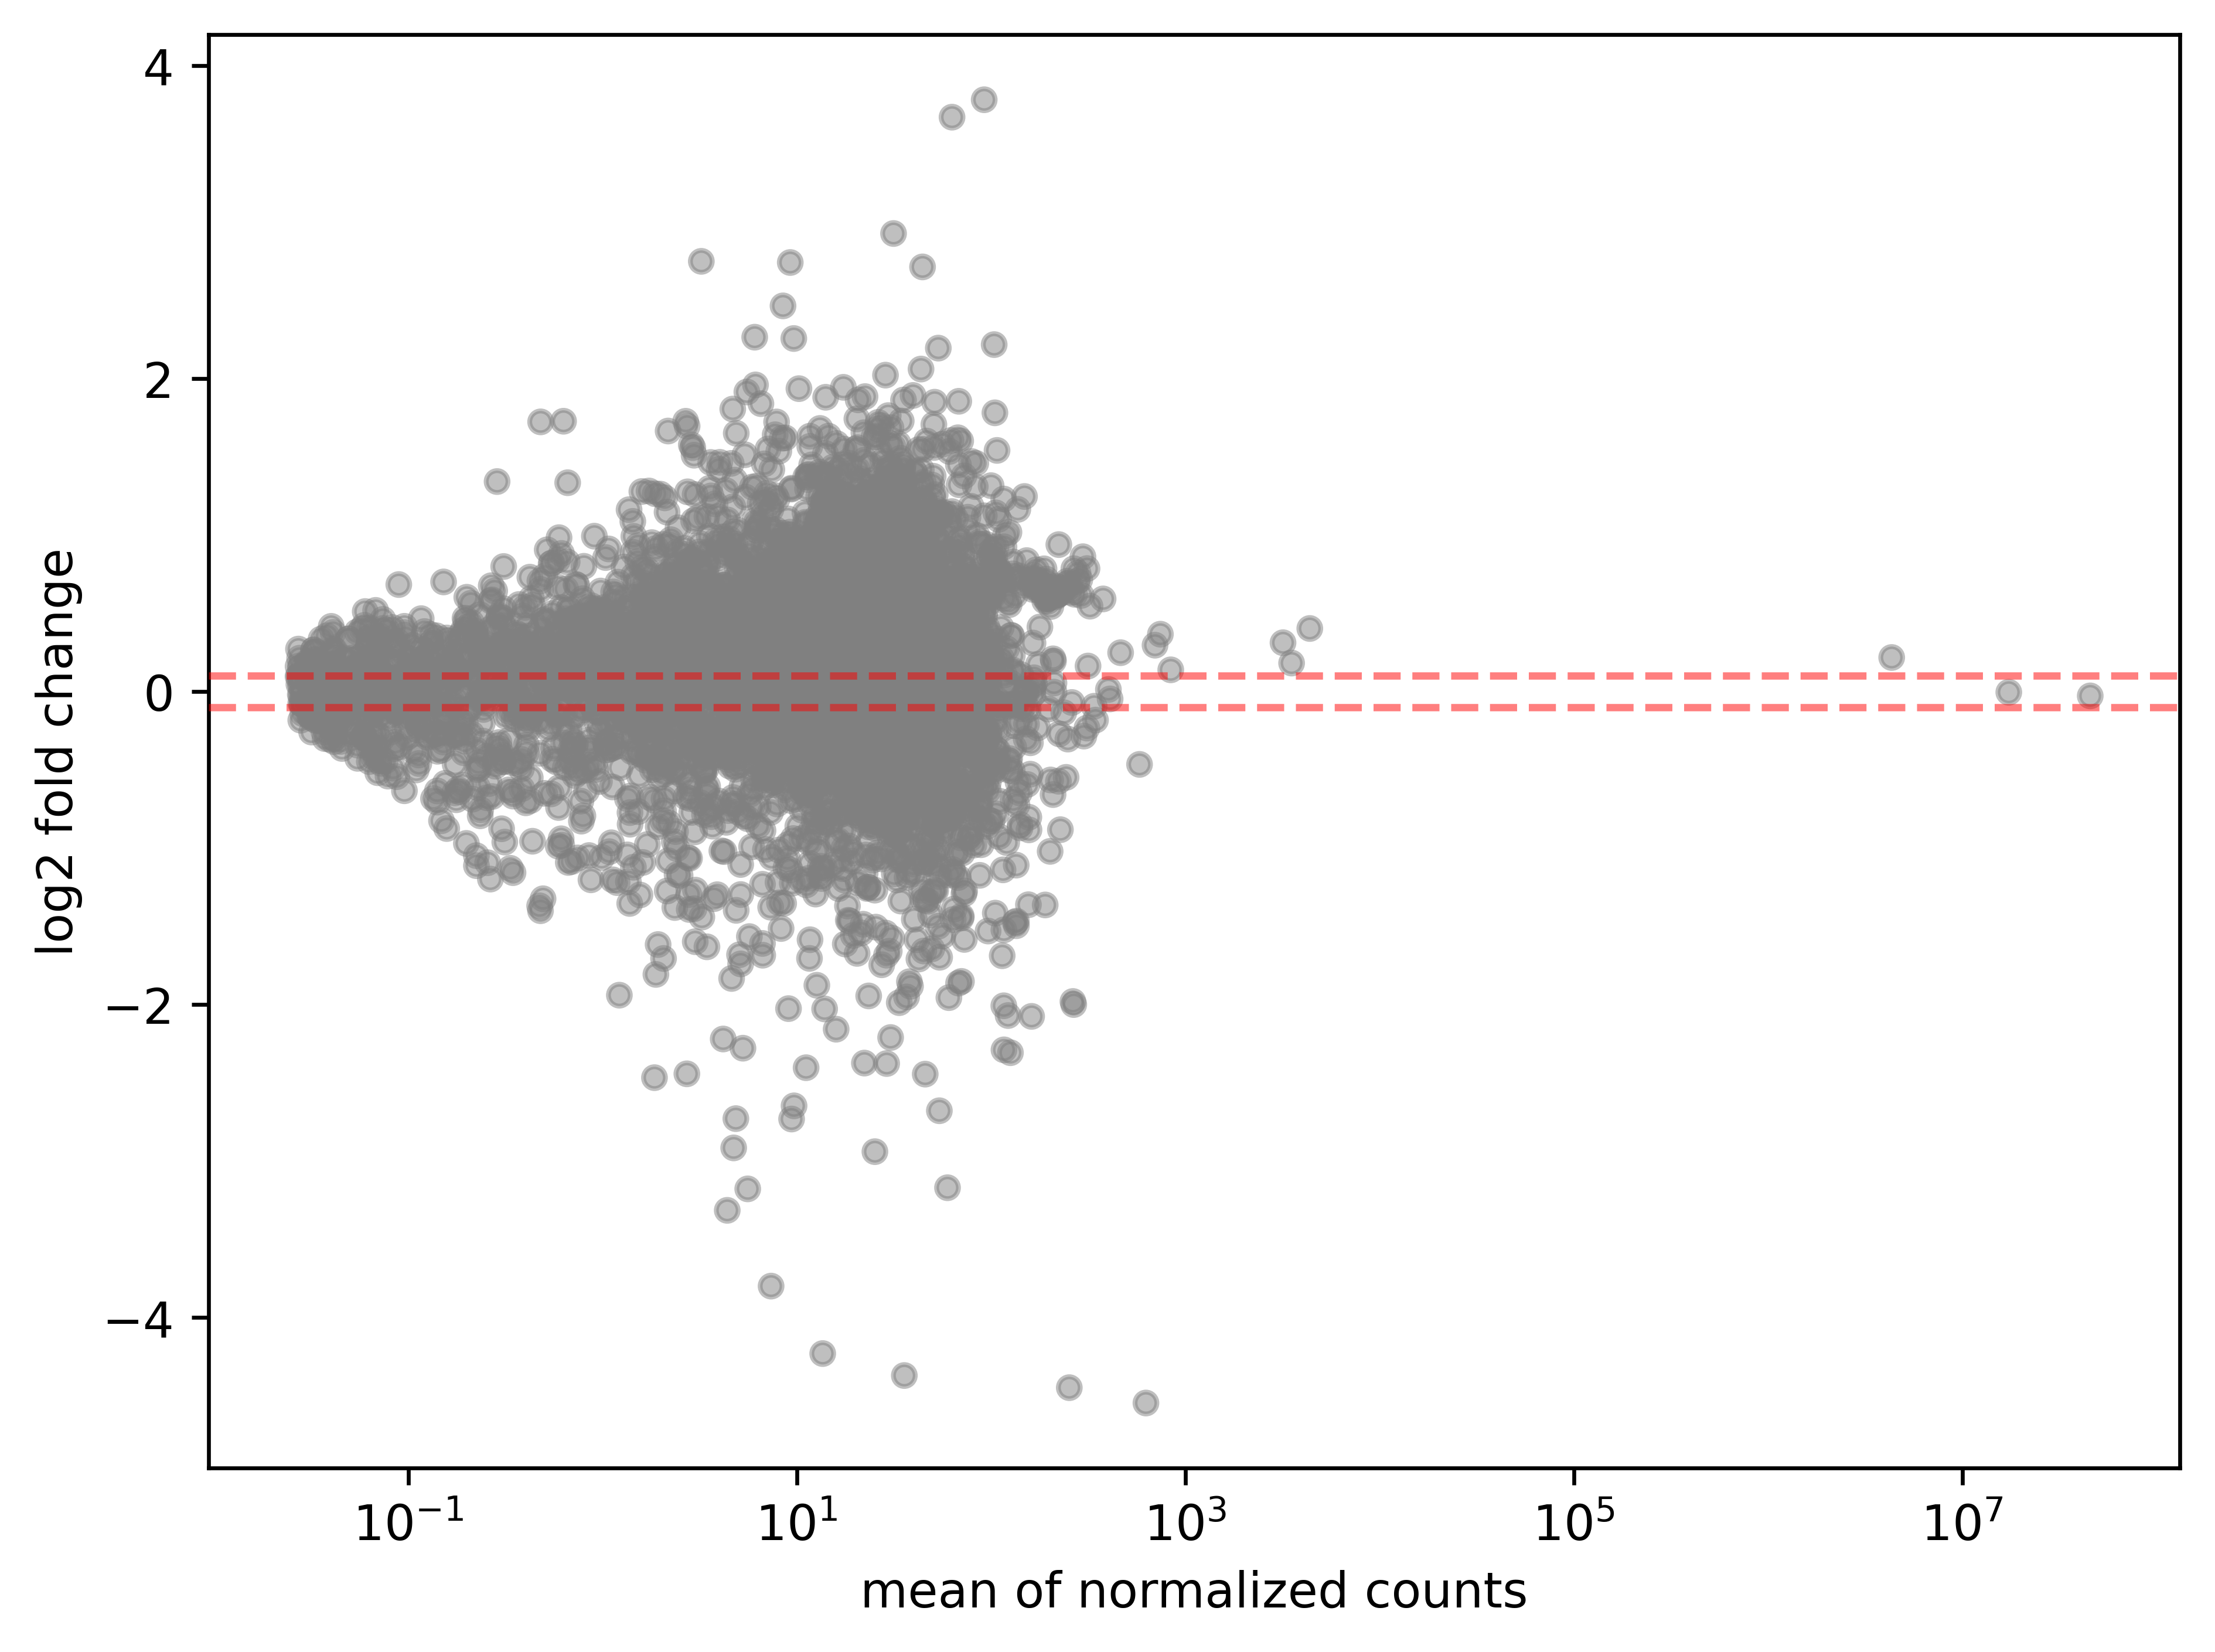

In [54]:
stat_res.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
stat_res.plot_MA(s=20)

In [57]:
mamba install --yes --quiet bioconda::multiqc

warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [62]:
! multiqc analysis/Trypanosoma/star/ --ignore "ref_brucei" --ignore "ref_congolense" -o analysis/Trypanosoma/multiqc


/// ]8;id=176728;https://multiqc.info\MultiQC]8;;\ 🔍 v1.22.2

       file_search | Search path: /Users/rmcolq/Work/git/pathbio3/analysis/Trypanosoma/star
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 127/127  0m  
              star | Found 18 reports and 18 gene count files
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : analysis/Trypanosoma/multiqc/multiqc_data_1
     write_results | Report      : analysis/Trypanosoma/multiqc/multiqc_report_1.html
           multiqc | MultiQC complete


/Users/rmcolq/Work/git/pathbio3
